# Übung 2 - Classification of Faces

In [ ]:
import os
import gzip
import h5py
import urllib
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16

## Downloading of Data

In [ ]:
# Downloading the data, if it does not exist, this will take some time... (>120MB)

if not os.path.isfile('8_faces_train_and_valid.hdf5'):
    urllib.request.urlretrieve("https://www.dropbox.com/s/dx03vk6dmbtoywn/8_faces_train_and_valid.hdf5?dl=1","8_faces_train_and_valid.hdf5")

!ls -l 8_faces_train_and_valid.hdf5

-rw-r--r-- 1 root root 132733792 Jan  7 08:40 8_faces_train_and_valid.hdf5


In [ ]:
h5f_X = h5py.File('8_faces_train_and_valid.hdf5', 'r')
print(list(h5f_X.keys()))
X_train = h5f_X['X_train_8_faces'][()]
print(X_train.shape)
Y_train = h5f_X['Y_train_8_faces'][()]
print(Y_train.shape)
X_valid = h5f_X['X_valid_8_faces'][()]
print(X_valid.shape)
Y_valid = h5f_X['Y_valid_8_faces'][()]
print(Y_valid.shape, X_valid.dtype)

['X_train_8_faces', 'X_valid_8_faces', 'Y_train_8_faces', 'Y_valid_8_faces']
(2000, 48, 48, 3)
(2000,)
(400, 48, 48, 3)
(400,) float64


250
(48, 48, 3)


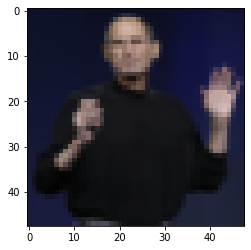

In [ ]:
n = 0 #Miranda Cosgrove
n = 1 #Chris Martin (singer)
n = 2 #Emma Stone (actress)
n = 3 #Jamie Foxx (actor)
n = 4 #Steve Jobs (entrepreneur)
n = 5 #Zac Efron (actor)
n = 6 #Sandra Oh (actress)
n = 7 #Taryn Manning (actress)
n = 4 
idx=np.reshape(np.where(Y_train[0:len(Y_train)]==n),(250))
print(len(Y_train[idx]))
print(np.shape(X_train[idx][0]))
plt.imshow(np.asarray(X_train[idx][0],dtype="uint8"))

In [ ]:
#Downloading the data, if it does not exist
if not os.path.isfile('8_faces_test.hdf5'):
  urllib.request.urlretrieve("https://www.dropbox.com/s/ugxrdo0lpc2ixvr/8_faces_test.hdf5?dl=1","8_faces_test.hdf5")

h5f_X = h5py.File('8_faces_test.hdf5', 'r')
print(list(h5f_X.keys()))
X_test = h5f_X['X_test_8_faces'][()]
print(X_test.shape)
Y_test = h5f_X['Y_test_8_faces'][()]
print(Y_test.shape)

['X_test_8_faces', 'Y_test_8_faces']
(400, 48, 48, 3)
(400,)


In [ ]:
np.min(X_train), np.max(X_train), np.min(X_test),np.max(X_test)
X_train /= 255
X_valid /= 255
X_test /= 255

In [ ]:
Y_train = to_categorical(Y_train)
Y_valid = to_categorical(Y_valid)
Y_test = to_categorical(Y_test)

In [ ]:
confusion_labels = ["Miranda Cosgrove [0]",
                    "Chris Martin [1]",
                    "Emma Stone [2]",
                    "Jamie Foxx [3]",
                    "Steve Jobs [4]",
                    "Zac Efron [5]",
                    "Sandra Oh [6]",
                    "Taryn Manning [7]"]

## a) Training an CNN from scratch

In [ ]:
model = Sequential([
                    Conv2D(15, kernel_size=3, padding='same', input_shape=(48, 48, 3)),
                    Activation('relu'),
                    Conv2D(15, kernel_size=3, padding='same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=2),
                    Conv2D(30, kernel_size=3, padding='same'),
                    Activation('relu'),
                    Conv2D(30, kernel_size=3, padding='same'),
                    Activation('relu'),
                    MaxPooling2D(pool_size=4),
                    Flatten(),
                    Dense(300),
                    Activation('relu'),
                    Dropout(0.5),
                    Dense(8, activation='softmax'),
])

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 15)        420       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 15)        2040      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 15)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 15)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 30)        4080      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 30)        0

In [ ]:
MODEL_FILENAME = "faces.h5"

callbacks = [ModelCheckpoint(MODEL_FILENAME, save_best_only=True)]

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), callbacks=callbacks)

model = keras.models.load_model(MODEL_FILENAME)

Epoch 1/20
63/63 [==============================] - 3s 13ms/step - loss: 2.0761 - accuracy: 0.1356 - val_loss: 2.0672 - val_accuracy: 0.1250
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 2.0732 - accuracy: 0.1386 - val_loss: 2.0574 - val_accuracy: 0.1375
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0571 - accuracy: 0.1655 - val_loss: 2.0450 - val_accuracy: 0.1750
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0447 - accuracy: 0.1791 - val_loss: 2.0265 - val_accuracy: 0.2175
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0247 - accuracy: 0.2179 - val_loss: 2.0062 - val_accuracy: 0.2075
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 2.0043 - accuracy: 0.2221 - val_loss: 1.9640 - val_accuracy: 0.2900
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 1.9819 - accuracy: 0.2501 - val_loss: 1.9196 - val_accuracy: 0.3225
Epoch 8/20
63/63 [=

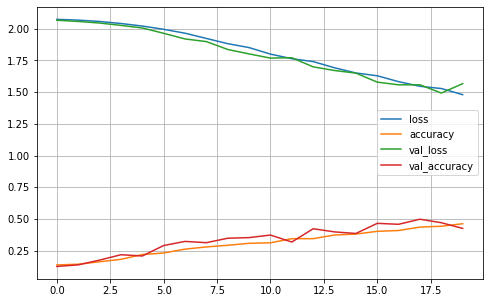

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
first_eval_loss, first_eval_accuracy = model.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 3ms/step - loss: 1.4817 - accuracy: 0.4725


In [ ]:
def plot_confusion_matrix(_y_pred, _y_test):
  confusion_mtx = tf.math.confusion_matrix(labels=_y_test, predictions=_y_pred)

  plt.figure(figsize=(10, 8))
  sns.heatmap(confusion_mtx, xticklabels=confusion_labels, yticklabels=confusion_labels, annot=True, fmt='g', cmap="viridis")
  plt.xlabel('Prediction')
  plt.ylabel('Label')
  plt.show()

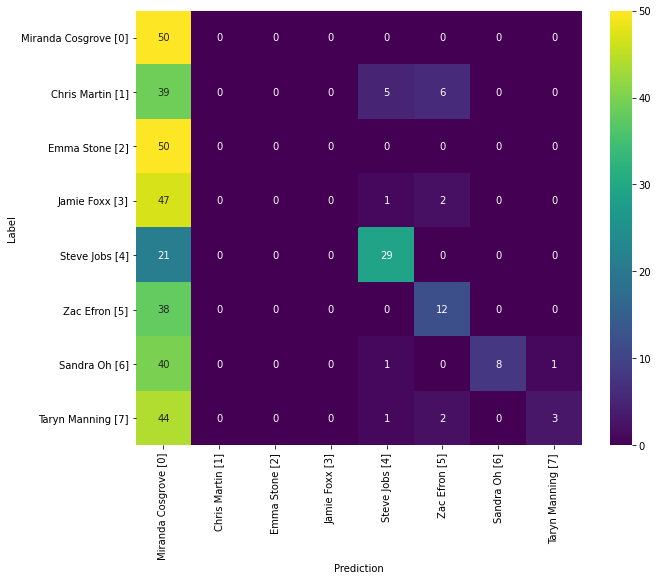

In [ ]:
Y_pred = (model.predict(X_test) > 0.5).astype("float32")

plot_confusion_matrix(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))

In [ ]:
def plot_predicted_images(_y_pred, _y_test, is_matched=True):
  fig = plt.figure(figsize = (15,10))

  if is_matched:
    matching = lambda x, y : x == y
  else:
    matching = lambda x, y : x != y

  i = 0
  for image_index, labels in enumerate(zip(_y_pred, _y_test)):
    pred, true = labels
    if matching(pred, true):
      plt.subplot(4, 5, i+1)
      
      plt.imshow(np.asarray(X_test[image_index]*255,dtype="uint8"))
      plt.title("True: " + confusion_labels[true] + "\nPred: " + confusion_labels[pred])
      i += 1

    if i == 20:
      break

  fig.tight_layout()
  plt.show()

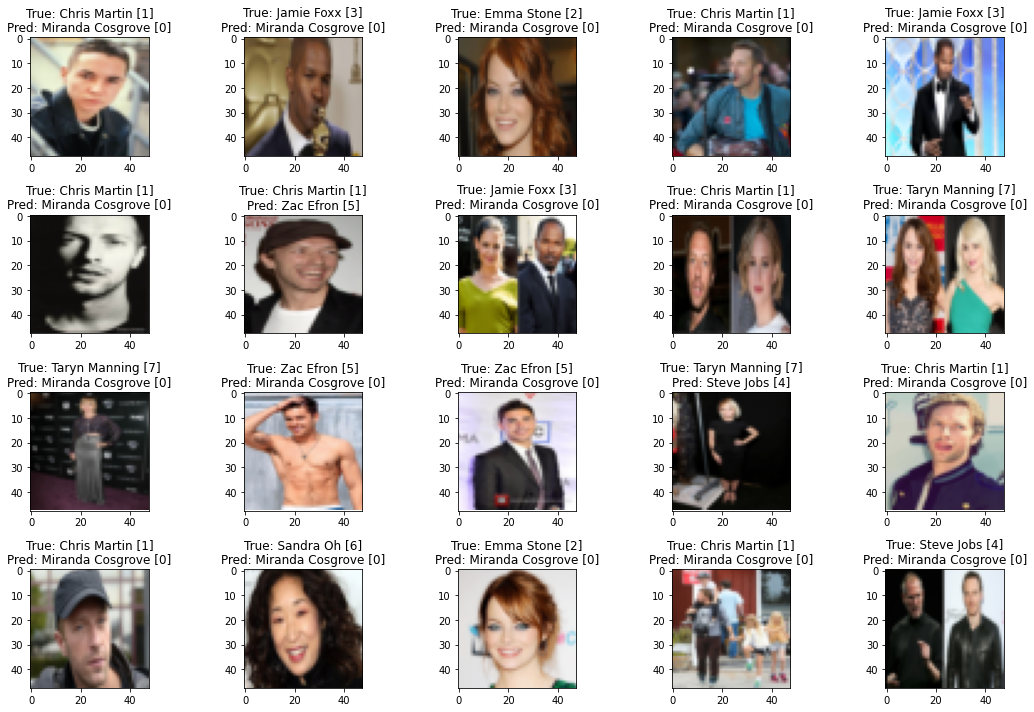

In [ ]:
plot_predicted_images(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1), False)

## b) Training using transfer learning

In [ ]:
img_height = img_width = 48
base_model = VGG16(weights='imagenet', include_top=False, input_shape = (img_width, img_height, 3))

In [ ]:
fc1 = base_model.output
fc1 = Flatten()(fc1)

fc1 = Dense(512, activation='relu', name='my_dense1')(fc1)
fc1 = Dense(512, activation='relu', name='my_dense2')(fc1)
fc1 = Dense(100, activation='relu', name='my_dense3')(fc1)

fc1 = Dense(8, activation='softmax', name='my_dense4')(fc1)

model_trans = tf.compat.v1.keras.Model(base_model.input, fc1) #Current hack for TF 2.0 and keras
model_trans.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_trans.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
for layer in model_trans.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [ ]:
TRANSFER_MODEL_FILENAME = "transfer_faces.h5"

callbacks = [ModelCheckpoint(TRANSFER_MODEL_FILENAME, save_best_only=True)]

history_trans = model_trans.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), callbacks=callbacks)

model_trans = keras.models.load_model(TRANSFER_MODEL_FILENAME)

Epoch 1/20
63/63 [==============================] - 4s 52ms/step - loss: 1.9910 - accuracy: 0.2298 - val_loss: 1.5620 - val_accuracy: 0.4625
Epoch 2/20
63/63 [==============================] - 3s 44ms/step - loss: 1.6298 - accuracy: 0.4046 - val_loss: 2.0143 - val_accuracy: 0.3200
Epoch 3/20
63/63 [==============================] - 3s 43ms/step - loss: 1.3954 - accuracy: 0.5224 - val_loss: 1.5013 - val_accuracy: 0.4700
Epoch 4/20
63/63 [==============================] - 3s 44ms/step - loss: 1.0604 - accuracy: 0.6402 - val_loss: 1.2818 - val_accuracy: 0.5375
Epoch 5/20
63/63 [==============================] - 3s 44ms/step - loss: 0.7745 - accuracy: 0.7325 - val_loss: 1.1933 - val_accuracy: 0.6000
Epoch 6/20
63/63 [==============================] - 3s 45ms/step - loss: 0.6380 - accuracy: 0.7896 - val_loss: 1.9324 - val_accuracy: 0.4375
Epoch 7/20
63/63 [==============================] - 3s 43ms/step - loss: 0.7639 - accuracy: 0.7560 - val_loss: 1.0714 - val_accuracy: 0.6900
Epoch 8/20
63

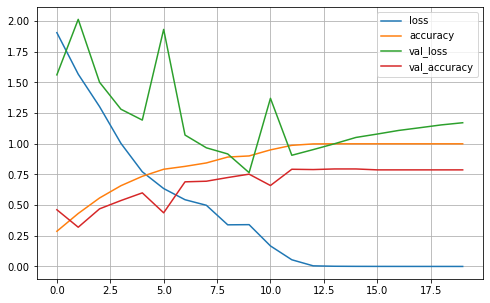

In [ ]:
pd.DataFrame(history_trans.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
trans_eval_loss, trans_eval_accuracy = model_trans.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 12ms/step - loss: 0.5760 - accuracy: 0.8075


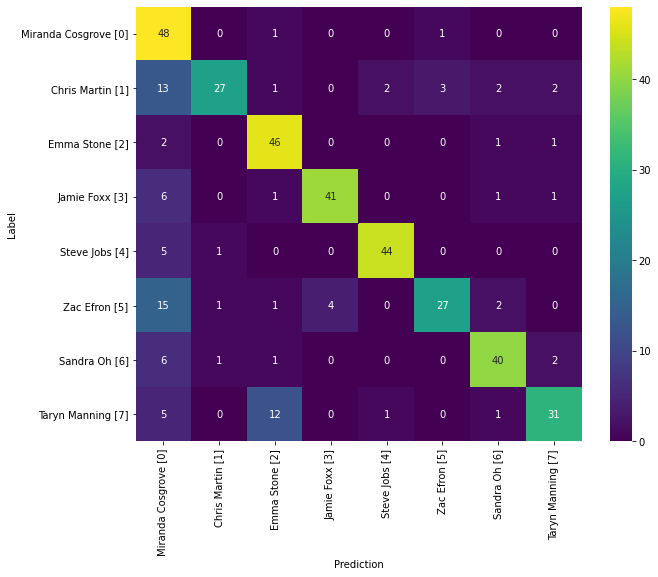

In [ ]:
Y_pred = (model_trans.predict(X_test) > 0.5).astype("float32")

plot_confusion_matrix(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))

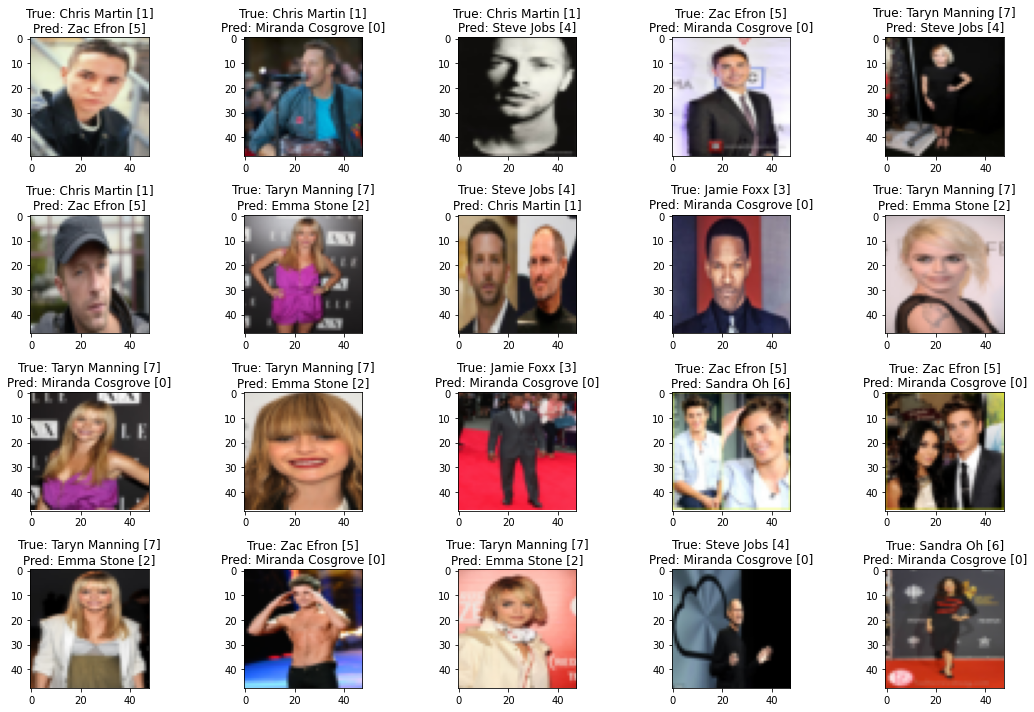

In [ ]:
plot_predicted_images(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1), False)

## c) Try to get better.

In [ ]:
fc2 = base_model.output

#fc2 = Conv2D(15, kernel_size=3, padding='same', name='my_conv1')(fc2)
fc2 = Flatten()(fc2)

fc2 = Dense(512, activation='relu', name='my_dense1')(fc2)
fc2 = Dropout(0.5)(fc2)
fc2 = Dense(512, activation='relu', name='my_dense2')(fc2)
fc2 = Dropout(0.5)(fc2)
fc2 = Dense(100, activation='relu', name='my_dense3')(fc2)
fc2 = Dropout(0.5)(fc2)

fc2 = Dense(8, activation='softmax', name='my_dense4')(fc2)

model_improved = tf.compat.v1.keras.Model(base_model.input, fc2) #Current hack for TF 2.0 and keras
model_improved.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_improved.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [ ]:
for layer in model_improved.layers:
  name = layer.name
  if name.startswith('my'):
    layer.trainable = True
    print(name)
  else:
    layer.trainable = False

my_dense1
my_dense2
my_dense3
my_dense4


In [ ]:
IMPROVED_MODEL_FILENAME = "improved_faces.h5"

callbacks = [ModelCheckpoint(IMPROVED_MODEL_FILENAME, save_best_only=True)]

history_improved = model_improved.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid), callbacks=callbacks)

model_improved = keras.models.load_model(IMPROVED_MODEL_FILENAME)

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 2.5495 - accuracy: 0.3674 - val_loss: 0.6713 - val_accuracy: 0.7800
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 0.7276 - accuracy: 0.7387 - val_loss: 0.6310 - val_accuracy: 0.7800
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 0.4377 - accuracy: 0.8587 - val_loss: 0.6914 - val_accuracy: 0.7825
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 0.2779 - accuracy: 0.8998 - val_loss: 0.7234 - val_accuracy: 0.7850
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 0.2068 - accuracy: 0.9273 - val_loss: 0.7754 - val_accuracy: 0.7925
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.1791 - accuracy: 0.9376 - val_loss: 0.8079 - val_accuracy: 0.7900
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.1546 - accuracy: 0.9436 - val_loss: 0.8620 - val_accuracy: 0.7900
Epoch 8/20
63

In [ ]:
improved_eval_loss, improved_eval_accuracy = model_improved.evaluate(X_test, Y_test)

13/13 [==============================] - 0s 17ms/step - loss: 0.4517 - accuracy: 0.8500


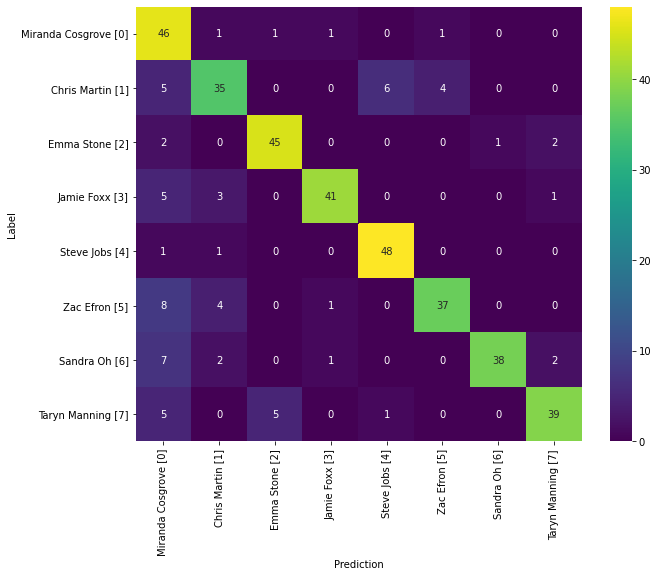

In [ ]:
Y_pred = (model_improved.predict(X_test) > 0.5).astype("float32")

plot_confusion_matrix(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1))

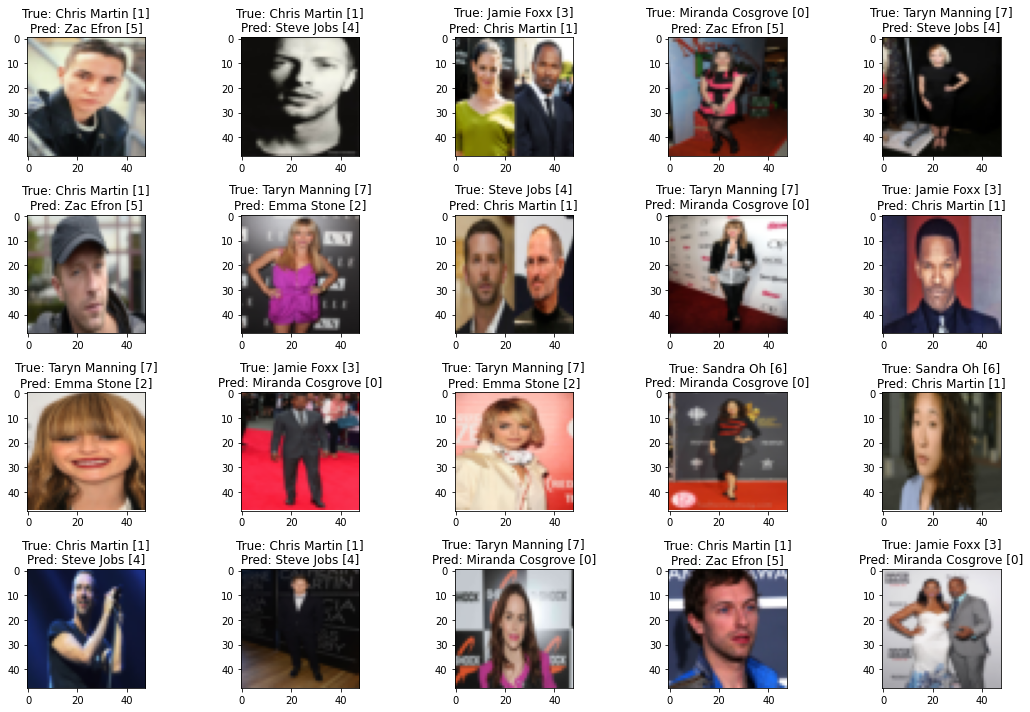

In [ ]:
plot_predicted_images(np.argmax(Y_pred, axis=1), np.argmax(Y_test, axis=1), False)

# Model comparisons

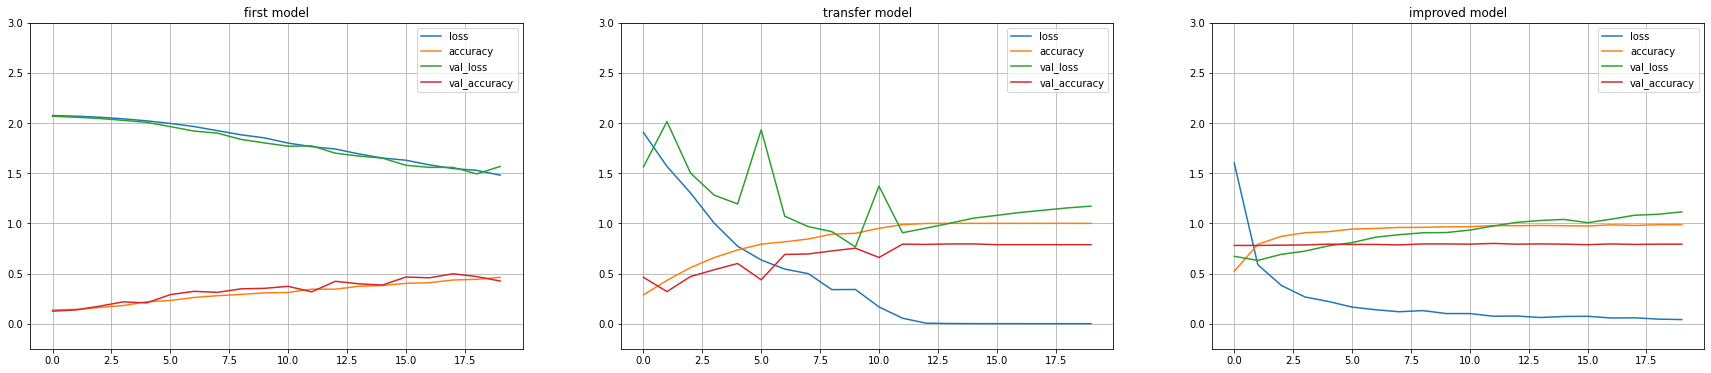

In [ ]:
fig = plt.figure(figsize = (30,6))

for i, hist in enumerate(zip([history, history_trans, history_improved], ["first model", "transfer model", "improved model"])):
  hist, title = hist
  ax = plt.subplot(1, 3, i+1)

  pd.DataFrame(hist.history).plot(ax=ax)
  ax.set_title(title)
  ax.grid(True)
  ax.set_ylim(-0.25, 3)

plt.show()

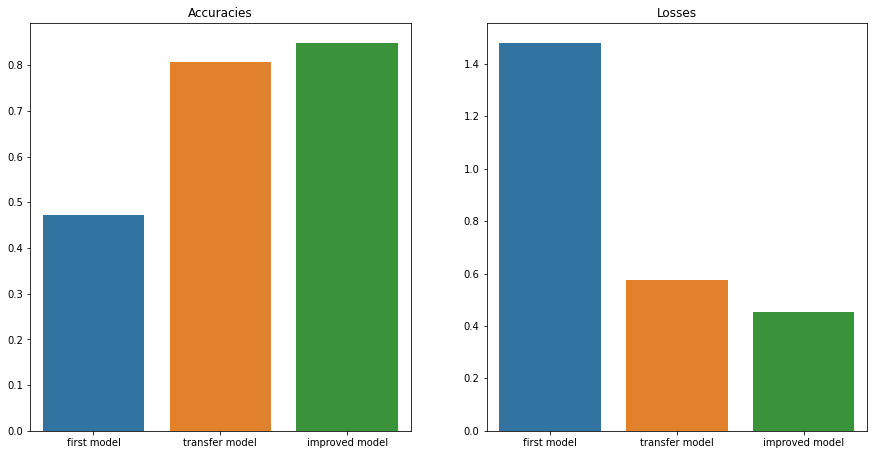

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(15,7.5))

sns.barplot(ax=axes[0], x=["first model", "transfer model", "improved model"], y=[first_eval_accuracy, trans_eval_accuracy, improved_eval_accuracy])
sns.barplot(ax=axes[1],x=["first model", "transfer model", "improved model"], y=[first_eval_loss, trans_eval_loss, improved_eval_loss])

axes[0].set_title("Accuracies")
axes[1].set_title("Losses")

plt.show()